In [ ]:
# KNN Classifier
# KNN: K Nearest Neighbors
# where K= number of nearest neighbors

# value of k is chosen based on some of the below guidelines
# k>1
# avoid k=even
# take the k value as nearer to sq.root of total number of data points

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/knn.csv")

In [ ]:
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [ ]:
df['Weight(x2)kg']

0     51kg
1     66kg
2     75kg
3     69kg
4     50kg
5     82kg
6     65kg
7     58kg
8     68kg
9     63kg
10    52kg
11    58kg
12    78kg
13    65kg
14    62kg
15    72kg
16    80kg
17    60kg
18    57kg
19    73kg
20    53kg
21    74kg
22    72kg
23    53kg
24    55kg
Name: Weight(x2)kg, dtype: object

In [ ]:
a="51kg"

In [ ]:
a.replace("kg","")

'51'

In [ ]:
(lambda a:a.replace("kg",""))("51kg")

'51'

In [ ]:
df['Weight(x2)kg'].apply(lambda a:a.replace("kg",""))

0     51
1     66
2     75
3     69
4     50
5     82
6     65
7     58
8     68
9     63
10    52
11    58
12    78
13    65
14    62
15    72
16    80
17    60
18    57
19    73
20    53
21    74
22    72
23    53
24    55
Name: Weight(x2)kg, dtype: object

In [ ]:
df['Weight(x2)kg'].apply(lambda a:a.replace("kg","")).astype('int')

0     51
1     66
2     75
3     69
4     50
5     82
6     65
7     58
8     68
9     63
10    52
11    58
12    78
13    65
14    62
15    72
16    80
17    60
18    57
19    73
20    53
21    74
22    72
23    53
24    55
Name: Weight(x2)kg, dtype: int64

In [ ]:
df['Weight(x2)kg']=df['Weight(x2)kg'].apply(lambda a:a.replace("kg","")).astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
df['Height(y2)cm']=df['Height(y2)cm'].apply(lambda a:a.replace("cm","")).astype('int')

In [ ]:
df.sample(3)

,Weight(x2)kg,Height(y2)cm,Class
15,72,180,Normal
19,73,164,Overweight
14,62,183,Underweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Weight(x2)kg    0
Height(y2)cm    0
Class           0
dtype: int64

In [ ]:
df.describe()

,Weight(x2)kg,Height(y2)cm
count,25.00000,25.000000
mean,64.44000,172.480000
std,9.62237,6.532738
min,50.00000,162.000000
25%,57.00000,168.000000
50%,65.00000,173.000000
75%,72.00000,178.000000
max,82.00000,183.000000


In [ ]:
df.sample(3)

,Weight(x2)kg,Height(y2)cm,Class
5,82,170,Overweight
2,75,169,Overweight
12,78,162,Overweight


In [ ]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values
# X=df[["Weight(x2)kg","Height(y2)cm"]].values
# y=df['Class'].values

In [ ]:
k=5
# because k>1, k is not even, k is nearer to sq. root of total number of data points sqrt(25)=5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')

In [ ]:
model.fit(X,y)

KNeighborsClassifier(metric='euclidean')

In [ ]:
pred=[[71.7,164.3]]
model.predict(pred)

array(['Overweight'], dtype=object)

In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
model.kneighbors(pred,k)

(array([[1.33416641, 4.35660418, 5.74282161, 6.70671305, 7.65375725]]),
 array([[19,  8,  2, 12, 13]]))

In [ ]:
model.kneighbors_graph(pred,k).toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
model.predict_proba(pred)

array([[0.2, 0.8, 0. ]])

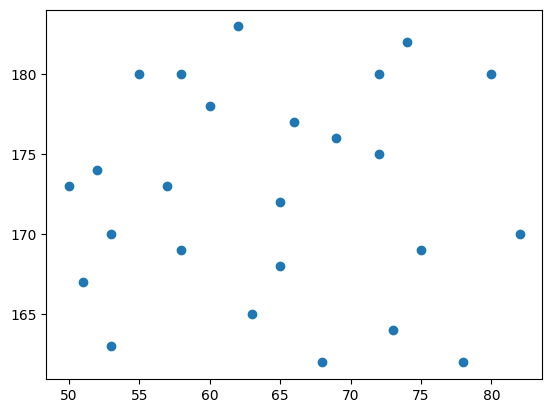

In [ ]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])
plt.show()

In [ ]:
df[df['Class']=="Normal"]
# Print the dataframe where Class column values is equal to Normal

,Weight(x2)kg,Height(y2)cm,Class
1,66,177,Normal
3,69,176,Normal
6,65,172,Normal
9,63,165,Normal
11,58,169,Normal
13,65,168,Normal
15,72,180,Normal
18,57,173,Normal
21,74,182,Normal
23,53,163,Normal


In [ ]:
df1=df[df['Class']=="Normal"]
df2=df[df['Class']=="Overweight"]
df3=df[df['Class']=="Underweight"]

In [ ]:
df1

,Weight(x2)kg,Height(y2)cm,Class
1,66,177,Normal
3,69,176,Normal
6,65,172,Normal
9,63,165,Normal
11,58,169,Normal
13,65,168,Normal
15,72,180,Normal
18,57,173,Normal
21,74,182,Normal
23,53,163,Normal


In [ ]:
df2

,Weight(x2)kg,Height(y2)cm,Class
2,75,169,Overweight
5,82,170,Overweight
8,68,162,Overweight
12,78,162,Overweight
16,80,180,Overweight
19,73,164,Overweight
22,72,175,Overweight


In [ ]:
df3

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
4,50,173,Underweight
7,58,180,Underweight
10,52,174,Underweight
14,62,183,Underweight
17,60,178,Underweight
20,53,170,Underweight
24,55,180,Underweight


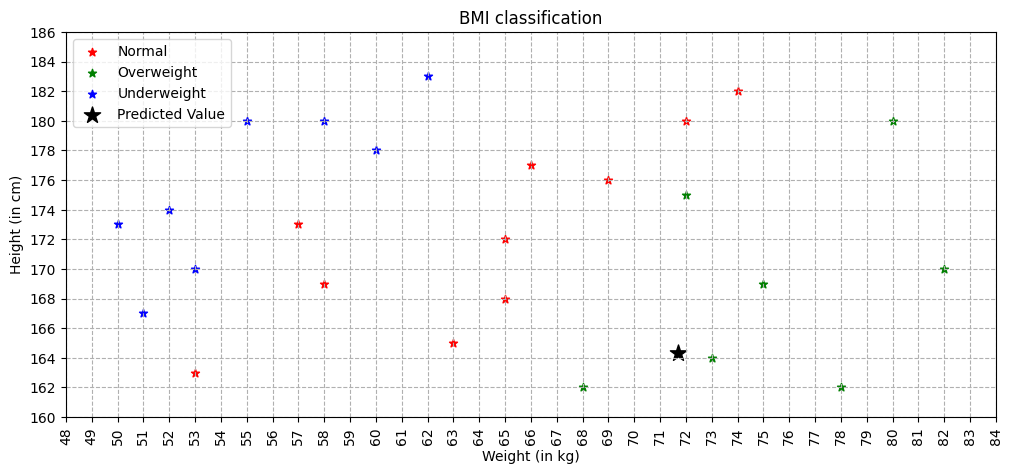

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(df1['Weight(x2)kg'],df1['Height(y2)cm'],label="Normal",marker="*",c="r")
plt.scatter(df2['Weight(x2)kg'],df2['Height(y2)cm'],label="Overweight",marker="*",c='g')
plt.scatter(df3['Weight(x2)kg'],df3['Height(y2)cm'],label="Underweight",marker="*",c='b')
plt.scatter(pred[0][0],pred[0][1],marker="*",label="Predicted Value",c="k",s=150)
plt.legend()
plt.grid(linestyle='dashed')
plt.xlabel("Weight (in kg)")
plt.ylabel("Height (in cm)")
plt.title("BMI classification")
plt.xticks(np.arange(48,85,1),rotation=90)
plt.yticks(np.arange(160,187,2))
plt.show()

In [ ]:
# Evaluation metrics for Classification
# Acccuracy Score
# Confusion Matrix
# Classification Report
# Precision Score
# Recall Score
# F1 Score
# AUC ROC

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_p=model.predict(X)
y_p

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
23/25

0.92

In [ ]:
accuracy_score(y,y_p)

0.92

In [ ]:
confusion_matrix(y,y_p)

array([[9, 0, 1],
       [1, 6, 0],
       [0, 0, 8]])

In [ ]:
pd.DataFrame(confusion_matrix(y,y_p),index=['Normal_A','Overweight_A','Underweight_A'],
             columns=['Normal_P','Overweight_P','Underweight_P'])

,Normal_P,Overweight_P,Underweight_P
Normal_A,9,0,1
Overweight_A,1,6,0
Underweight_A,0,0,8


In [ ]:
(9+6+8)/(9+6+8+1+1)

0.92

In [ ]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [ ]:
print("Precision for Normal:",9/10)
print("Recall for Normal:",9/10)
print("Precision for Overweight:",6/6)
print("Recall for Overweight:",6/7)
print("Precision for Underweight:",8/9)
print("Recall for Underweight:",8/8)

Precision for Normal: 0.9
Recall for Normal: 0.9
Precision for Overweight: 1.0
Recall for Overweight: 0.8571428571428571
Precision for Underweight: 0.8888888888888888
Recall for Underweight: 1.0


In [ ]:
# When you cannot afford to miss any detection, you look for high recall
# When you cannot afford to have any incorrect detection, you look for high precision

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
import joblib
joblib.dump(model,'knn_model')

['knn_model']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load("knn_model")
st.title("BMI Classifier")
weight=st.number_input("Enter the weight(in kg)",min_value=45,max_value=95,value=65,step=1)
height=st.number_input("Enter the height(in cm)",min_value=140,max_value=190,value=155,step=1)

if st.button("PREDICT"):
  op=model.predict([[weight,height]])
  st.subheader("The person weighing "+str(weight)+"kg and having a height of "+str(height)+
  "cm is categorized as "+str(op[0])+".")

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 06fff86565044d6

npx: installed 22 in 4.903s
your url is: https://lemon-rocks-fetch.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.246.126:8501

  Stopping...
^C
